<a href="https://colab.research.google.com/github/BharatSingla12/Play-Store-App-Review-Analysis-EDA/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## Importing the all the important libraies 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Mount the drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## load the files 

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/User Reviews.csv")

## Lets first try to explore the user reviews data 

In [4]:
df.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [6]:
df.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

In [7]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [8]:
df = df.dropna(how= "all", subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'])

In [9]:
df.isnull().sum()

App                       0
Translated_Review         5
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [10]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [11]:
def sentiment(value):
    if value == 'Positive':
        return 1
    elif value == 'Neutral':
        return 0
    elif value == 'Negative':
        return -1
    else:
        return 0
df['Sentiment'] = df['Sentiment'].apply(lambda x :sentiment(x))


In [12]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,1,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,1,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,1,0.40,0.875000
4,10 Best Foods for You,Best idea us,1,1.00,0.300000
5,10 Best Foods for You,Best way,1,1.00,0.300000


In [13]:
df = df.groupby('App', as_index=False).agg({"Translated_Review": "count", "Sentiment": "mean", "Sentiment_Polarity": "mean", "Sentiment_Subjectivity" : "mean"})


In [14]:
df = df.sort_values(by='Translated_Review', ascending=False)
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
256,Bowmasters,312,0.160256,0.061415,0.500548
817,Helix Jump,273,0.553114,0.099665,0.487221
114,Angry Birds Classic,273,-0.084249,-0.007537,0.534886
328,Calorie Counter - MyFitnessPal,254,0.458824,0.215674,0.472952
510,Duolingo: Learn Languages Free,240,0.691667,0.200408,0.470215


In [15]:
df = df.sort_values(by='Sentiment', ascending=False)
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
220,Best Fiends - Free Puzzle Game,1,1.0,0.325000,0.537500
439,Daniel Tiger for Parents,3,1.0,0.279630,0.509039
316,Calendar+ Schedule Planner App,1,1.0,0.319071,0.469744
100,Amazon Prime Video,2,1.0,0.461111,0.555556
761,Google+,2,1.0,0.368056,0.469444


## Lets now explore the playstore data 

In [56]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA Capstone Project/Play Store Data.csv")

In [57]:
# Load the playstore data 
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [59]:
List_of_Genres = []
for i in df['Genres'].unique():
    if ";" not in i:
        List_of_Genres.append(i)
    if ";" in i:
        List_of_Genres + i.split(";")
set_of_Genres = set(List_of_Genres)

print(f"There are a total of {set_of_Genres} unique generas.")
print("List of generas are:")
set_of_Genres

There are a total of {'Music', 'Casino', 'Libraries & Demo', 'Action', 'Education', 'Educational', 'Productivity', 'Strategy', 'Books & Reference', 'Social', 'Sports', 'Lifestyle', 'Business', 'Arcade', 'Trivia', 'House & Home', 'Role Playing', 'Photography', 'Art & Design', 'Dating', 'Card', 'Auto & Vehicles', 'Tools', 'News & Magazines', 'Weather', 'Health & Fitness', 'Beauty', 'Racing', 'Adventure', 'Video Players & Editors', 'Entertainment', 'Travel & Local', 'Puzzle', 'Word', 'Maps & Navigation', 'Events', 'February 11, 2018', 'Shopping', 'Parenting', 'Communication', 'Casual', 'Comics', 'Finance', 'Simulation', 'Medical', 'Board', 'Personalization', 'Food & Drink'} unique generas.
List of generas are:


{'Action',
 'Adventure',
 'Arcade',
 'Art & Design',
 'Auto & Vehicles',
 'Beauty',
 'Board',
 'Books & Reference',
 'Business',
 'Card',
 'Casino',
 'Casual',
 'Comics',
 'Communication',
 'Dating',
 'Education',
 'Educational',
 'Entertainment',
 'Events',
 'February 11, 2018',
 'Finance',
 'Food & Drink',
 'Health & Fitness',
 'House & Home',
 'Libraries & Demo',
 'Lifestyle',
 'Maps & Navigation',
 'Medical',
 'Music',
 'News & Magazines',
 'Parenting',
 'Personalization',
 'Photography',
 'Productivity',
 'Puzzle',
 'Racing',
 'Role Playing',
 'Shopping',
 'Simulation',
 'Social',
 'Sports',
 'Strategy',
 'Tools',
 'Travel & Local',
 'Trivia',
 'Video Players & Editors',
 'Weather',
 'Word'}

In [109]:
df['Category'].value_counts()

FAMILY                 1971
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [61]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [62]:
df['Price'].value_counts()

0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$1.75         1
$14.00        1
$4.85         1
$46.99        1
$1.04         1
Name: Price, Length: 93, dtype: int64

In [63]:
df['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [64]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [65]:
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: Installs, dtype: int64

In [66]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [67]:
#  lets define the functions to clean the data 

# Here we are replacing "Varies with size" with the mean of the app size. 
# Expressing the size in numerical data in the units of MB.

def sizetonumber(row):
    # Filter out last letter 
    if row[-1].upper() == "M":
        row = float(row[0:-1])
    elif row[-1].upper() == "K":
        row = float(row[0:-1])/1000
    else:
        row = None                 
    return row

df["Size"] = df["Size"].apply(sizetonumber)
df['Size'].fillna(df['Size'].mean(), inplace=True)

df.rename(columns={"Size": "Size(MB)"})

,App,Category,Rating,Reviews,Size(MB),Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.00000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.70000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.00000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.80000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.00000,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.60000,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.50000,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21.51653,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [69]:
#  lets define the functions to clean the data 
# Expressing the Reviews in integers form.

def reviewstonumber(row):
    # Filter out last letter 
    if row[-1].upper() == "M":
        row = int(float(row[0:-1]))*10**6
    else:   
        row = int(row)
    return row

df["Reviews"] = df["Reviews"].apply(reviewstonumber)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [71]:
# Expressing the Installs in integers form.

def Installstonumber(row):
    try:
        returnvalue = int(row[:-1].replace(',', ''))
    except:
        try:
            returnvalue =  int(row)
        except:
            returnvalue = 0
    return returnvalue

df["Installs"] = df["Installs"].apply(Installstonumber)

In [74]:
df = df.drop(['Last Updated', 'Current Ver'], axis = 1)


In [95]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,4.4 and up


In [76]:
df[df['Type'] == '0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3000000,21.51653,0,0,Everyone,NaN,"February 11, 2018",NaN


In [78]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False


In [85]:
a = True 
b = True 


In [86]:

a+b

2

In [96]:
[df.isnull().sum(axis=1) >= 1]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 10836    False
 10837    False
 10838     True
 10839    False
 10840    False
 Length: 10841, dtype: bool]

In [100]:
df[~ (df.drop(['Rating'], axis = 1).isnull().sum(axis=1) >= 1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.00000,10000,Free,0,Everyone,Art & Design,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.00000,500000,Free,0,Everyone,Art & Design;Pretend Play,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.70000,5000000,Free,0,Everyone,Art & Design,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.00000,50000000,Free,0,Teen,Art & Design,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.80000,100000,Free,0,Everyone,Art & Design;Creativity,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.00000,5000,Free,0,Everyone,Education,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.60000,100,Free,0,Everyone,Education,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.50000,1000,Free,0,Everyone,Medical,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21.51653,1000,Free,0,Mature 17+,Books & Reference,Varies with device


In [105]:
None_df = df[(df.drop(['Rating'], axis = 1).isnull().sum(axis=1) >= 1)]

In [103]:
df = df.drop(None_df.index)

In [106]:
None_df = df[(df.drop(['Rating'], axis = 1).isnull().sum(axis=1) >= 1)]

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10837 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10837 non-null  object 
 1   Category        10837 non-null  object 
 2   Rating          9364 non-null   float64
 3   Reviews         10837 non-null  int64  
 4   Size            10837 non-null  float64
 5   Installs        10837 non-null  int64  
 6   Type            10837 non-null  object 
 7   Price           10837 non-null  object 
 8   Content Rating  10837 non-null  object 
 9   Genres          10837 non-null  object 
 10  Android Ver     10837 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1016.0+ KB


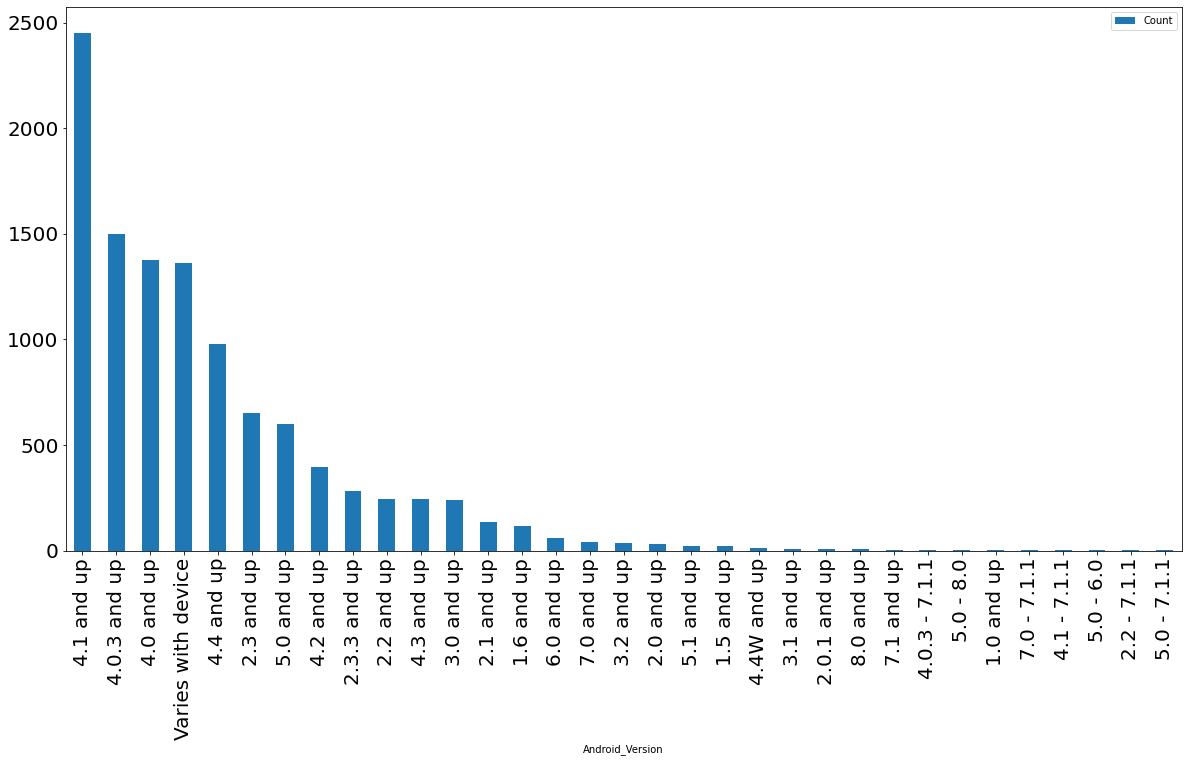

In [132]:
pd.DataFrame(df['Android Ver'].value_counts()).reset_index().rename(columns = {'index' : "Android_Version", 'Android Ver' : "Count"}).plot(x = 'Android_Version', y = 'Count', kind = 'bar', figsize  = (20,10), fontsize = 20)

In [144]:
df[['Installs', 'Category']].groupby('Category', as_index=False).sum().sort_values(by='Installs', ascending=False).head()

,Category,Installs
14,GAME,35086024415
6,COMMUNICATION,32647276251
25,PRODUCTIVITY,14176091369
27,SOCIAL,14069867902
29,TOOLS,11452771915


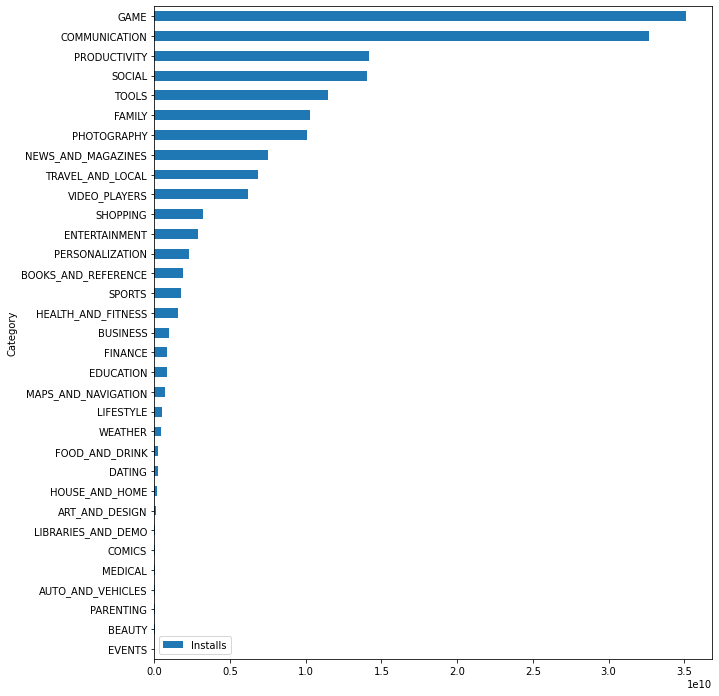

In [154]:
df[['Installs', 'Category']].groupby('Category', as_index=False).sum().sort_values(by='Installs', ascending=True).plot(y = 'Installs', x = 'Category', kind = 'barh', figsize  = (10,12))

In [157]:
df[['Installs', 'Size']].groupby('Size', as_index=False).sum().sort_values(by='Installs', ascending=False).head()

,Size,Installs
380,21.51653,102568200023
435,76.00000,6299110150
371,13.00000,4641252835
433,74.00000,3827110600
421,62.00000,3067551910


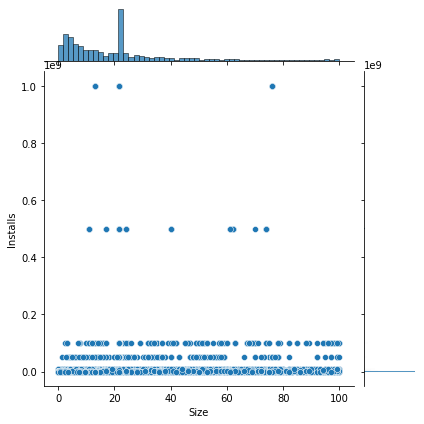

In [165]:
# df[['Installs', 'Size']].plot(y = 'Installs', x = 'Size', kind = 'scatter', figsize  = (10,12))
sns.jointplot(x='Size', y='Installs', data=df)


In [159]:
df[['Installs', 'Content Rating']].groupby('Content Rating', as_index=False).sum().sort_values(by='Installs', ascending=False).head()

,Content Rating,Installs
1,Everyone,114156648621
4,Teen,34716350393
2,Everyone 10+,13233881795
3,Mature 17+,5524491178
0,Adults only 18+,2000000


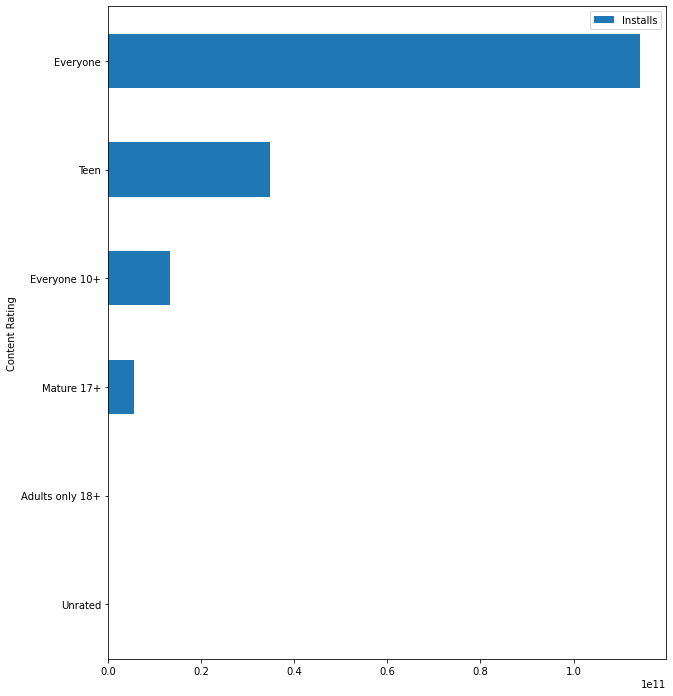

In [162]:
df[['Installs', 'Content Rating']].groupby('Content Rating', as_index=False).sum().sort_values(by='Installs', ascending=True).plot(y = 'Installs', x = 'Content Rating', kind = 'barh', figsize  = (10,12))

Rating      AxesSubplot(0.125,0.826831;0.775x0.053169)
Reviews     AxesSubplot(0.125,0.763028;0.775x0.053169)
Size        AxesSubplot(0.125,0.699225;0.775x0.053169)
Installs    AxesSubplot(0.125,0.635423;0.775x0.053169)
dtype: object

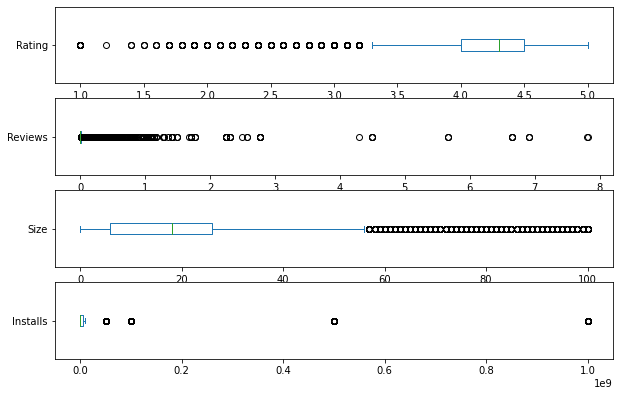

In [166]:
df.plot(kind = 'box', figsize  = (10,20),subplots = True, vert=0, layout  = (12,1),sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75bdda8bd0>],
      dtype=object)

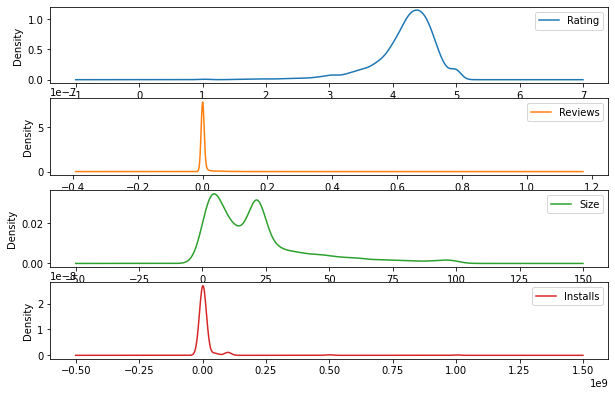

In [167]:
df.plot(kind = 'kde', figsize  = (10,20),subplots = True, layout  = (12,1),sharex = False)

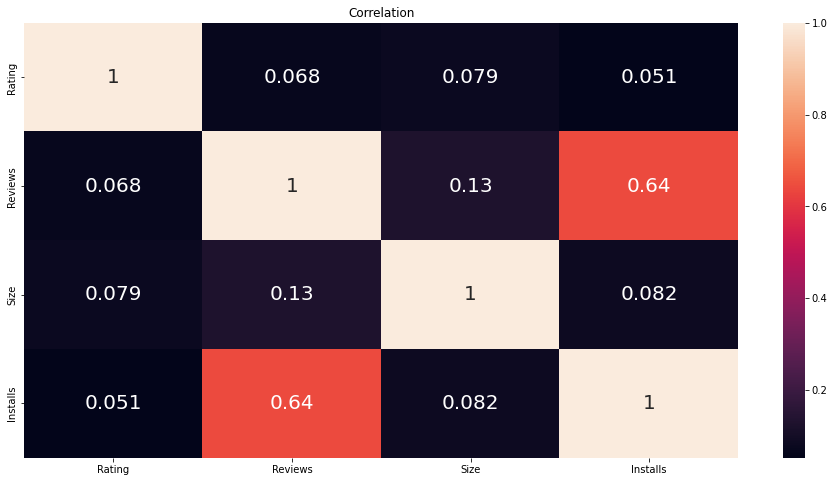

In [172]:
# 
corr = df.corr()


plt.figure(figsize=(16,8))
# sns.heatmap(corr, vmax=1, vmin=-1, center=0,
# 			linewidth=.5,square=True, annot = True,
#             annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r', ax=ax1,  # ax: use this when using subplot
#             cbar_kws = dict(use_gridspec=False,location="top", shrink=0.9)) # cbar_kws: for positioning cbar and "shrink" for reducing cbar size

sns.heatmap(corr, xticklabels= corr.columns, yticklabels = corr.columns, annot = True, annot_kws = {'size':20})

plt.title('Correlation')
plt.show()

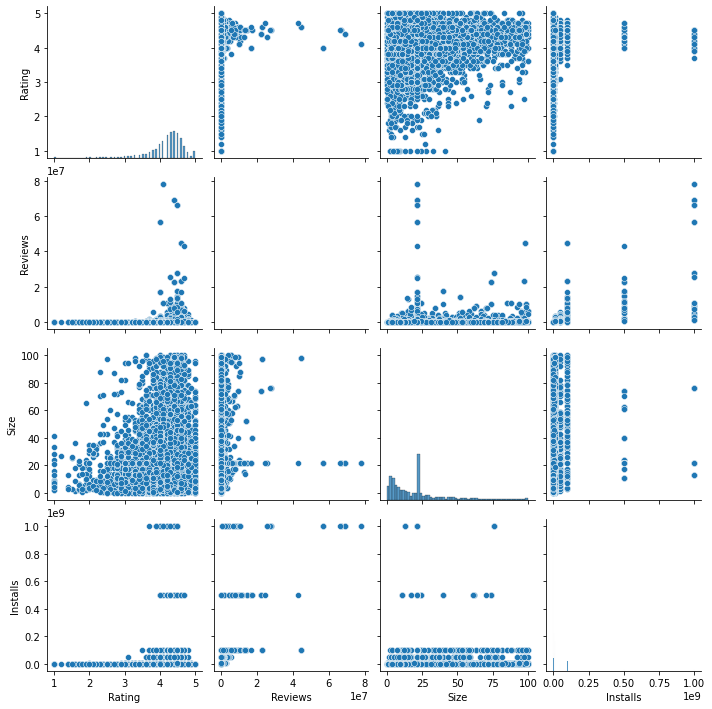

In [169]:
# Plot the pair plot
sns.pairplot(df)